In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Datasets

In [2]:
df1 = pd.read_csv('Plant_1_Generation_Data.csv')
df2 = pd.read_csv('datasets_836676_1428586_Plant_1_Weather_Sensor_Data.csv')
df3 = pd.read_csv('Plant_2_Generation_Data.csv')
df4 = pd.read_csv('datasets_836676_1428586_Plant_2_Weather_Sensor_Data.csv')

In [3]:
df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [5]:
df3.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [6]:
df4.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


# Data Preprocessing

In [7]:
df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'], format = '%d-%m-%Y %H:%M')
df1['DATE'] = df1['DATE_TIME'].dt.date
df1['DATE'] = pd.to_datetime(df1['DATE'], format = '%Y-%m-%d')
df1['TIME'] = df1['DATE_TIME'].dt.time
df1['HOUR'] = pd.to_datetime(df1['TIME'], format = '%H:%M:%S').dt.hour
df1['Minute'] = pd.to_datetime(df1['TIME'], format = '%H:%M:%S').dt.minute
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
 7   DATE         68778 non-null  datetime64[ns]
 8   TIME         68778 non-null  object        
 9   HOUR         68778 non-null  int64         
 10  Minute       68778 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 5.8+ MB


In [8]:
df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'], format = '%Y-%m-%d %H:%M')
df2['DATE'] = df2['DATE_TIME'].dt.date
df2['DATE'] = pd.to_datetime(df2['DATE'], format = '%Y-%m-%d')
df2['TIME'] = df2['DATE_TIME'].dt.time
df2['HOUR'] = pd.to_datetime(df2['TIME'], format = '%H:%M:%S').dt.hour
df2['Minute'] = pd.to_datetime(df2['TIME'], format = '%H:%M:%S').dt.minute
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
 6   DATE                 3182 non-null   datetime64[ns]
 7   TIME                 3182 non-null   object        
 8   HOUR                 3182 non-null   int64         
 9   Minute               3182 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 248.7+ KB


In [9]:
df3['DATE_TIME'] = pd.to_datetime(df3['DATE_TIME'], format ='%Y-%m-%d %H:%M')
df3['DATE'] = df3['DATE_TIME'].dt.date
df3['DATE'] = pd.to_datetime(df3['DATE'],format = '%Y-%m-%d')
df3['TIME'] = df3['DATE_TIME'].dt.time
df3['HOUR'] = pd.to_datetime(df3['TIME'],format='%H:%M:%S').dt.hour
df3['MINUTES'] = pd.to_datetime(df3['TIME'],format='%H:%M:%S').dt.minute
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
 7   DATE         67698 non-null  datetime64[ns]
 8   TIME         67698 non-null  object        
 9   HOUR         67698 non-null  int64         
 10  MINUTES      67698 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 5.7+ MB


In [10]:
df4['DATE_TIME'] = pd.to_datetime(df4['DATE_TIME'], format ='%Y-%m-%d %H:%M')
df4['DATE'] = df4['DATE_TIME'].dt.date
df4['DATE'] = pd.to_datetime(df4['DATE'],format = '%Y-%m-%d')
df4['TIME'] = df4['DATE_TIME'].dt.time
df4['HOUR'] = pd.to_datetime(df4['TIME'],format='%H:%M:%S').dt.hour
df4['MINUTES'] = pd.to_datetime(df4['TIME'],format='%H:%M:%S').dt.minute
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
 6   DATE                 3259 non-null   datetime64[ns]
 7   TIME                 3259 non-null   object        
 8   HOUR                 3259 non-null   int64         
 9   MINUTES              3259 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 254.7+ KB


# Date Vs DC Power

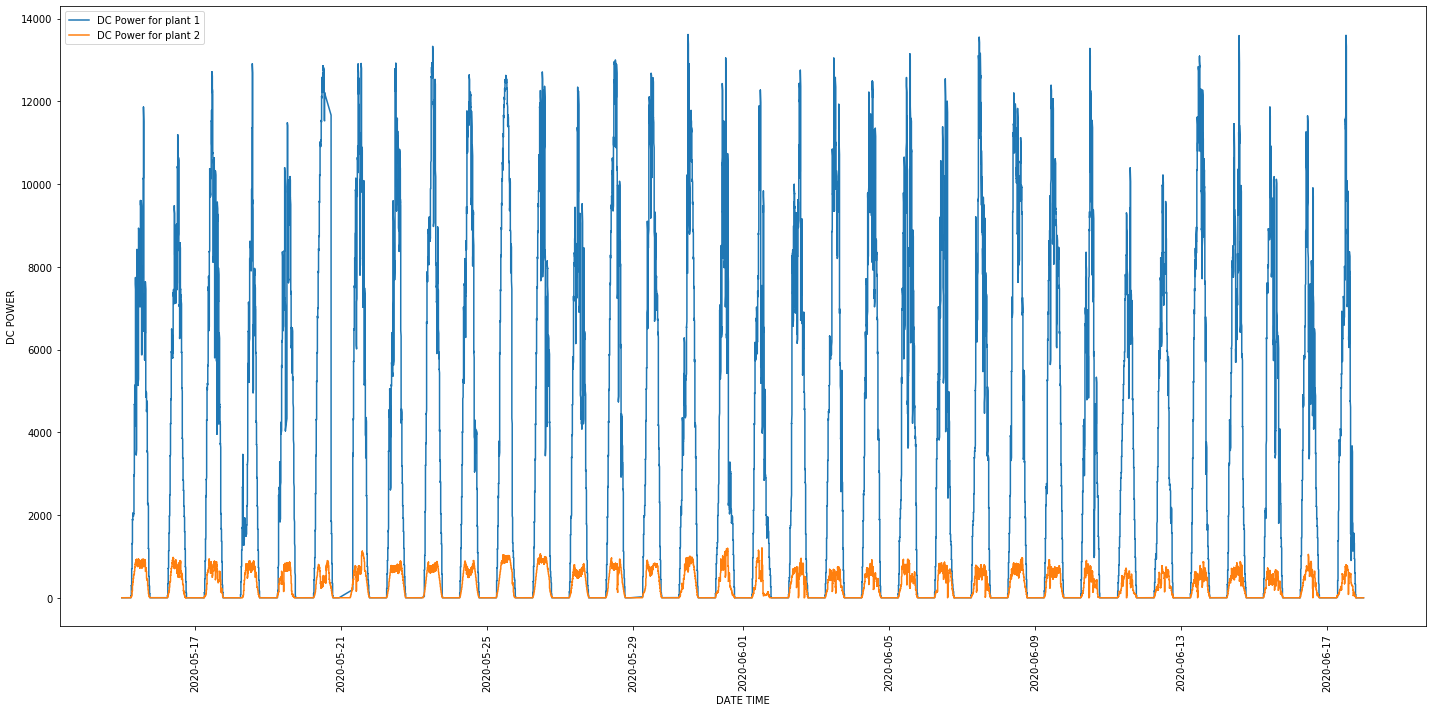

In [11]:
plt.subplots(1,1, figsize=(20,10))
plt.plot(df1.DATE_TIME, df1.DC_POWER.rolling(window=20).mean(), label='DC Power for plant 1')
plt.plot(df3.DATE_TIME, df3.DC_POWER.rolling(window=20).mean(), label='DC Power for plant 2')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('DC POWER')
plt.tight_layout()
plt.legend()
plt.show()

# Date Vs AC Power

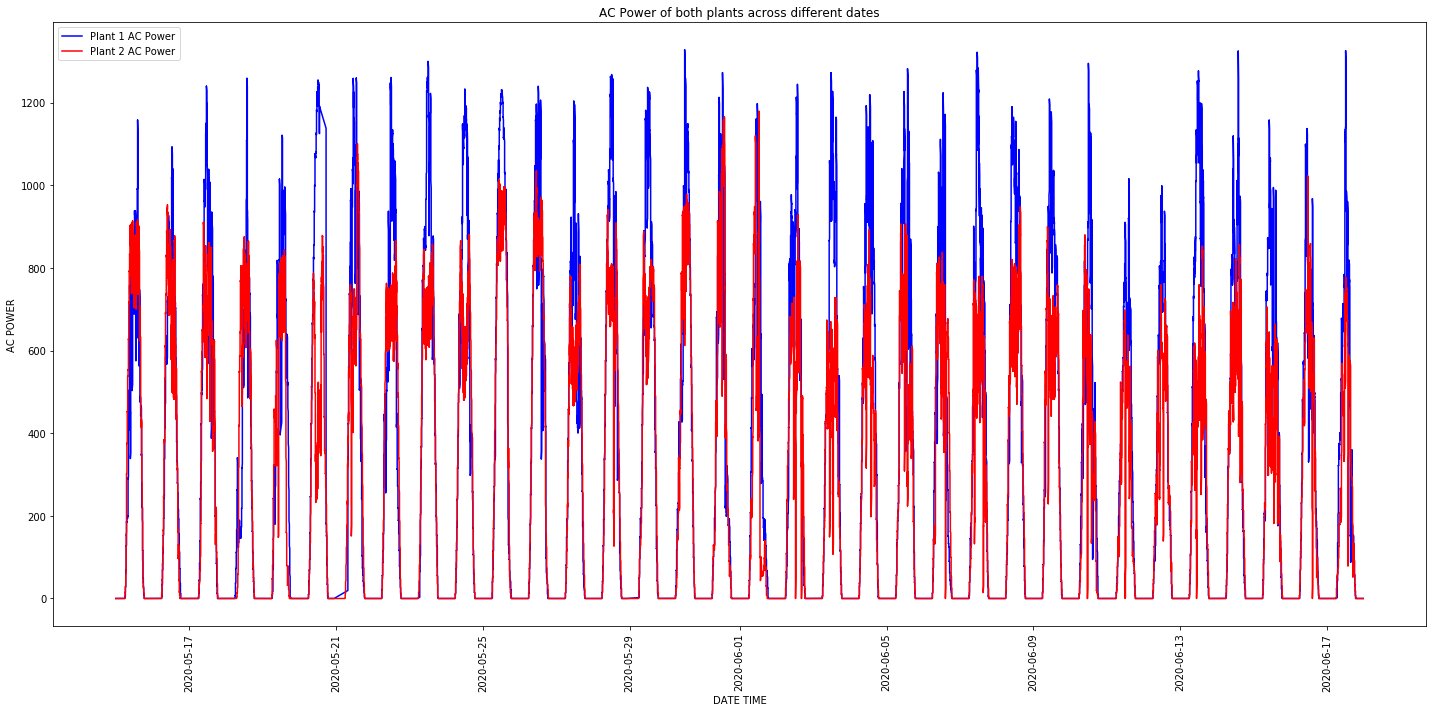

In [12]:
plt.subplots(1,1, figsize=(20,10))
plt.title("AC Power of both plants across different dates")
plt.plot(df1.DATE_TIME, df1.AC_POWER.rolling(window=20).mean(), label='Plant 1 AC Power', c='b')
plt.plot(df3.DATE_TIME, df3.AC_POWER.rolling(window=20).mean(), label='Plant 2 AC Power', c='r')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('AC POWER')
plt.tight_layout()
plt.legend()
plt.show()

# DC Power vs AC Power

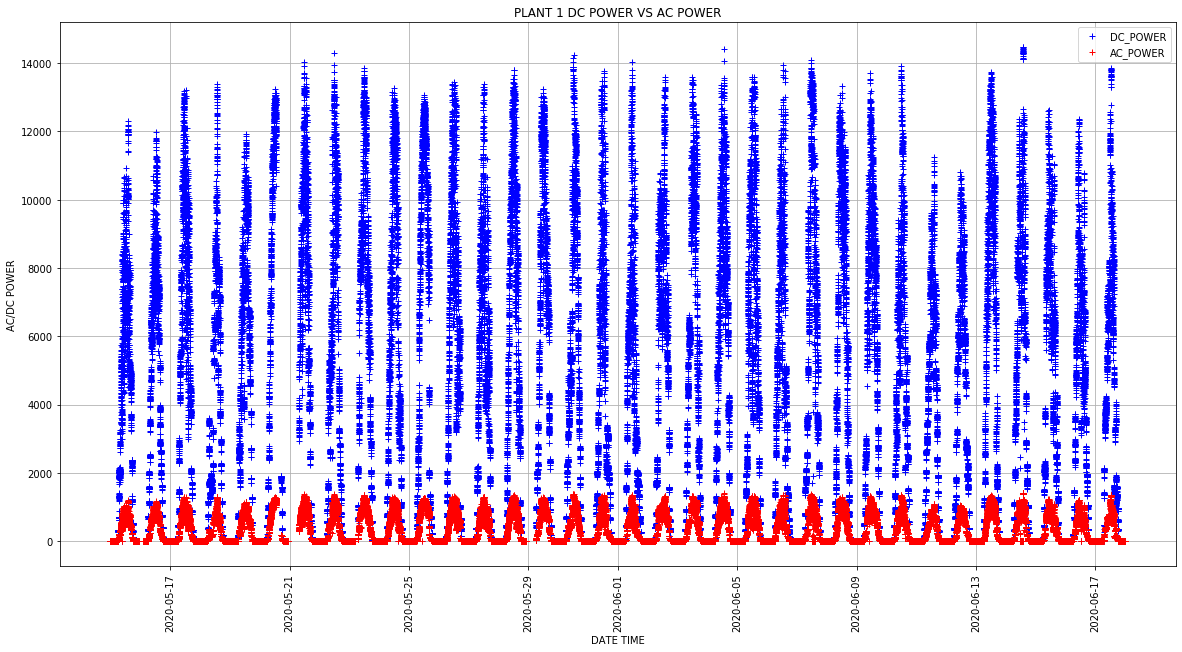

In [15]:
plt.subplots(1,1, figsize=(20, 10))
plt.title("PLANT 1 DC POWER VS AC POWER")
plt.plot(df1.DATE_TIME, df1.DC_POWER, marker='+', linestyle='', label='DC_POWER', c='b')
plt.plot(df1.DATE_TIME, df1.AC_POWER, marker = '+', linestyle='', label='AC_POWER', c='r')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('AC/DC POWER')
plt.grid()
plt.legend()
plt.show()

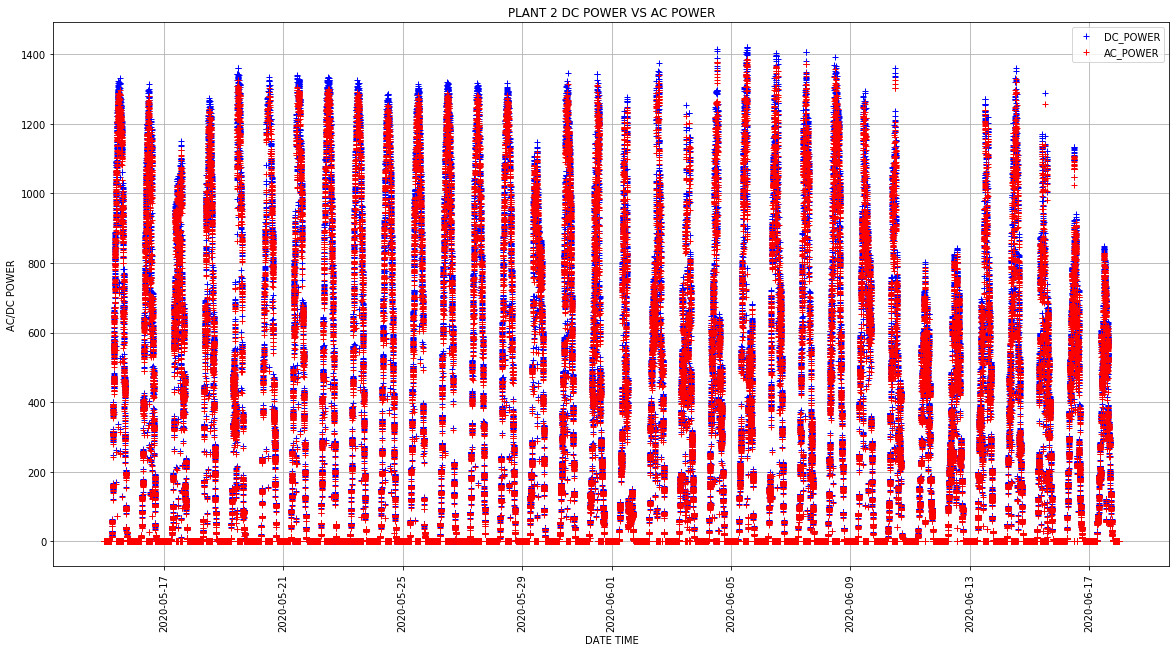

In [16]:
plt.subplots(1,1, figsize=(20, 10))
plt.title("PLANT 2 DC POWER VS AC POWER")
plt.plot(df3.DATE_TIME, df3.DC_POWER, marker='+', linestyle='', label='DC_POWER', c='b')
plt.plot(df3.DATE_TIME, df3.AC_POWER, marker = '+', linestyle='', label='AC_POWER', c='r')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('AC/DC POWER')
plt.grid()
plt.legend()
plt.show()

 # Date Vs Ambient Temparature

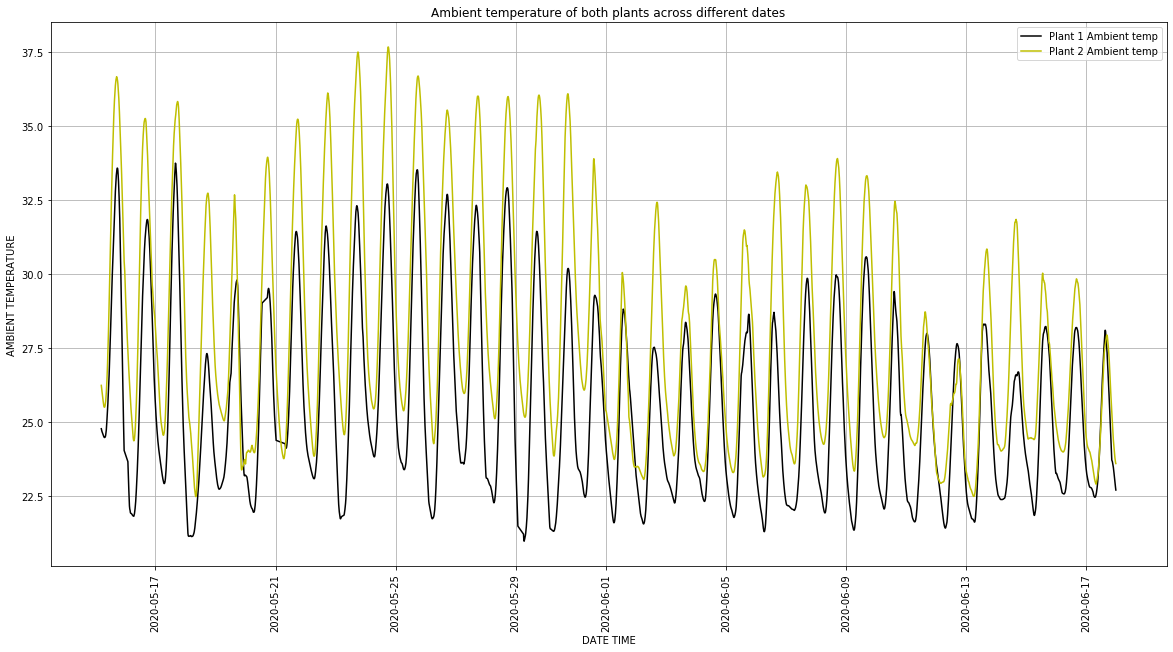

In [17]:
plt.subplots(1,1, figsize=(20,10))
plt.title("Ambient temperature of both plants across different dates")
plt.plot(df2.DATE_TIME, df2.AMBIENT_TEMPERATURE.rolling(window=20).mean(), label='Plant 1 Ambient temp', c='k')
plt.plot(df4.DATE_TIME, df4.AMBIENT_TEMPERATURE.rolling(window=20).mean(), label='Plant 2 Ambient temp', c='y')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('AMBIENT TEMPERATURE')
plt.grid()
plt.legend()
plt.show()

# Date vs Module Temparature

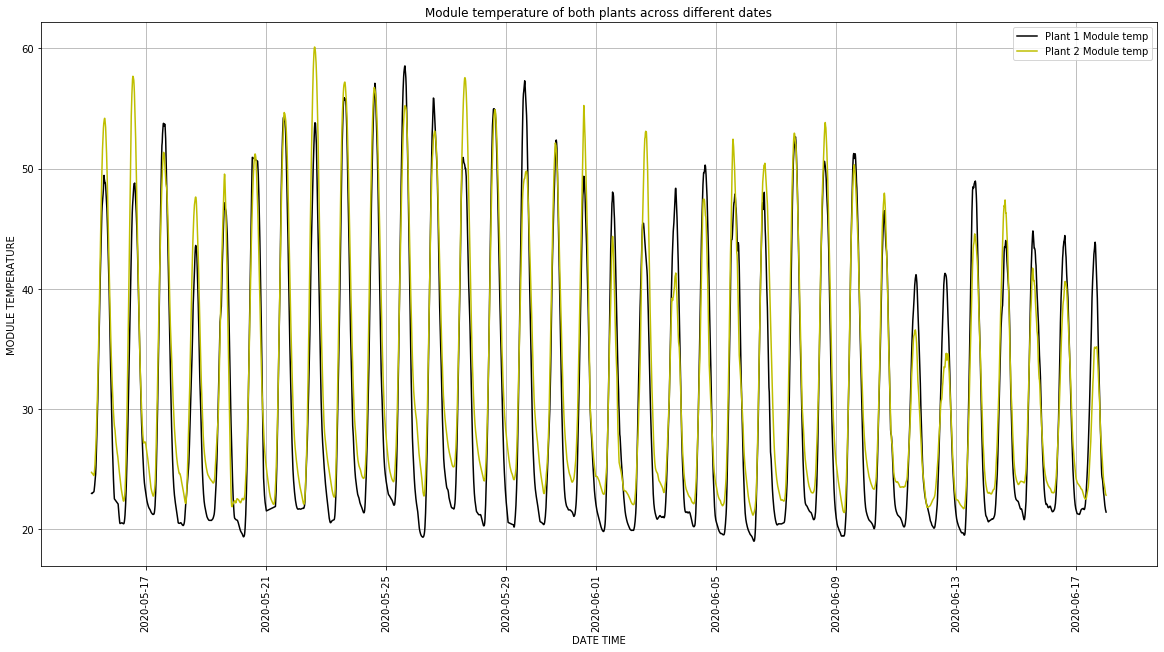

In [18]:
plt.subplots(1,1, figsize=(20,10))
plt.title("Module temperature of both plants across different dates")
plt.plot(df2.DATE_TIME, df2.MODULE_TEMPERATURE.rolling(window=20).mean(), label='Plant 1 Module temp', c='k')
plt.plot(df4.DATE_TIME, df4.MODULE_TEMPERATURE.rolling(window=20).mean(), label='Plant 2 Module temp', c='y')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('MODULE TEMPERATURE')
plt.grid()
plt.legend()
plt.show()

#  Comparing Ambient and Module Temparature

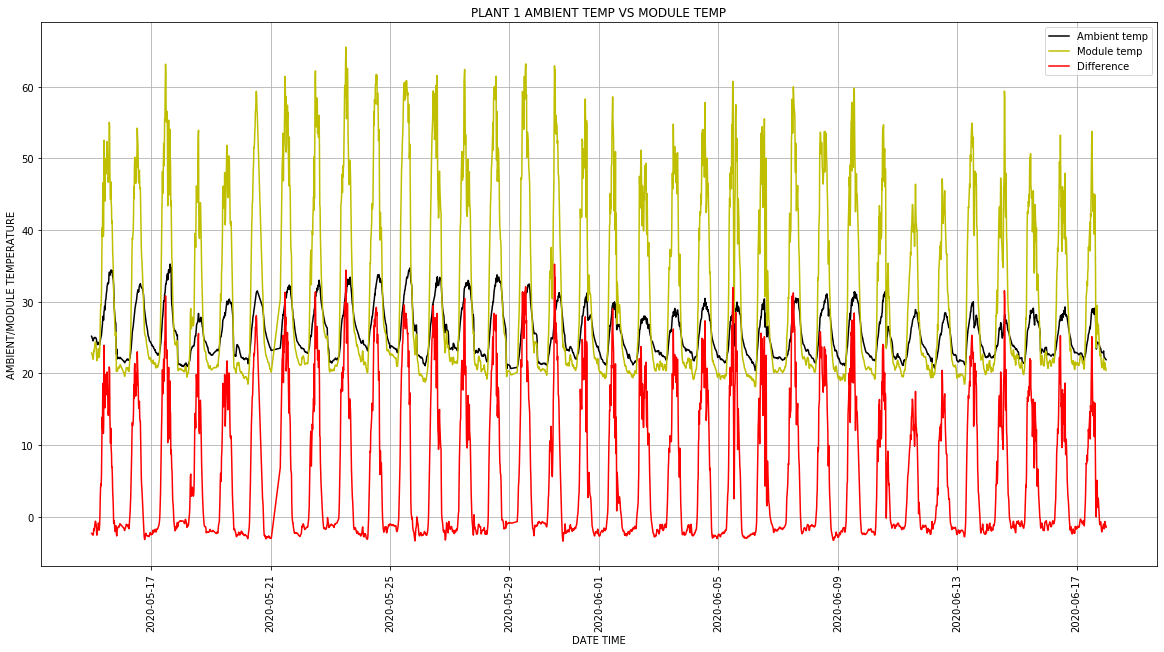

In [19]:
plt.subplots(1,1, figsize=(20, 10))
plt.title("PLANT 1 AMBIENT TEMP VS MODULE TEMP")
plt.plot(df2['DATE_TIME'], df2['AMBIENT_TEMPERATURE'], label ='Ambient temp', c ='k')
plt.plot(df2['DATE_TIME'],df2['MODULE_TEMPERATURE'], label ='Module temp', c='y' )
plt.plot(df2['DATE_TIME'],df2['MODULE_TEMPERATURE']-df2['AMBIENT_TEMPERATURE'], label ='Difference' , c ='r')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('AMBIENT/MODULE TEMPERATURE')
plt.grid()
plt.legend()
plt.show()

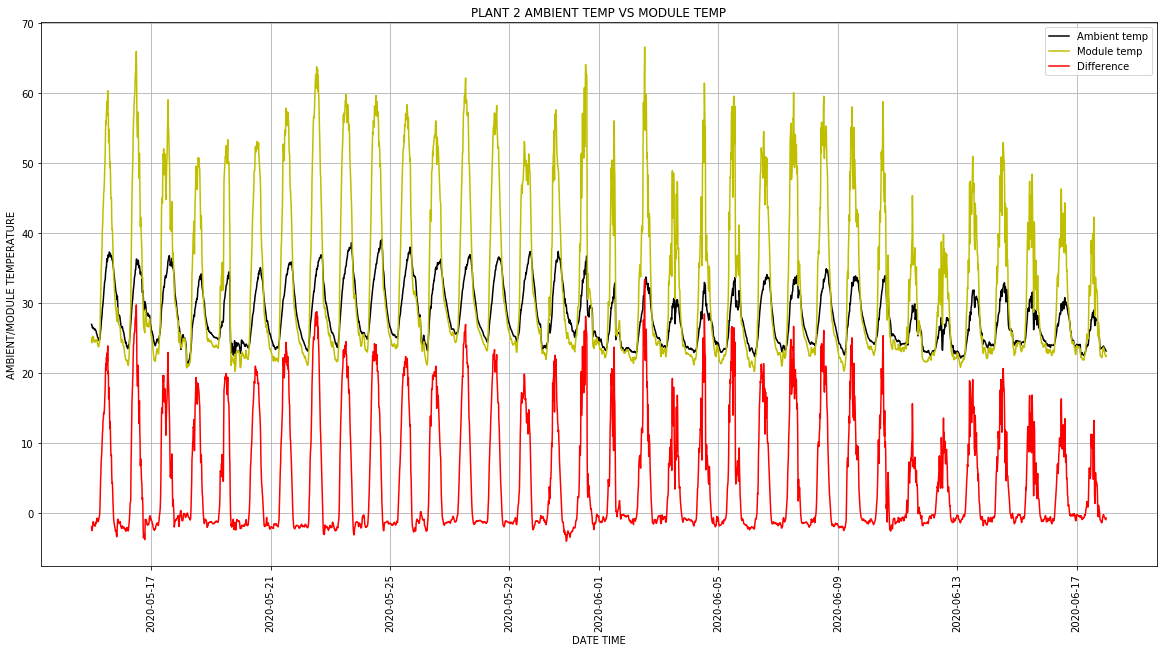

In [20]:
plt.subplots(1,1, figsize=(20, 10))
plt.title("PLANT 2 AMBIENT TEMP VS MODULE TEMP")
plt.plot(df4['DATE_TIME'], df4['AMBIENT_TEMPERATURE'], label ='Ambient temp', c ='k')
plt.plot(df4['DATE_TIME'],df4['MODULE_TEMPERATURE'], label ='Module temp', c='y' )
plt.plot(df4['DATE_TIME'],df4['MODULE_TEMPERATURE']-df4['AMBIENT_TEMPERATURE'], label ='Difference' , c ='r')
plt.xticks(rotation = 90)
plt.xlabel('DATE TIME')
plt.ylabel('AMBIENT/MODULE TEMPERATURE')
plt.grid()
plt.legend()
plt.show()

# Daily Yield

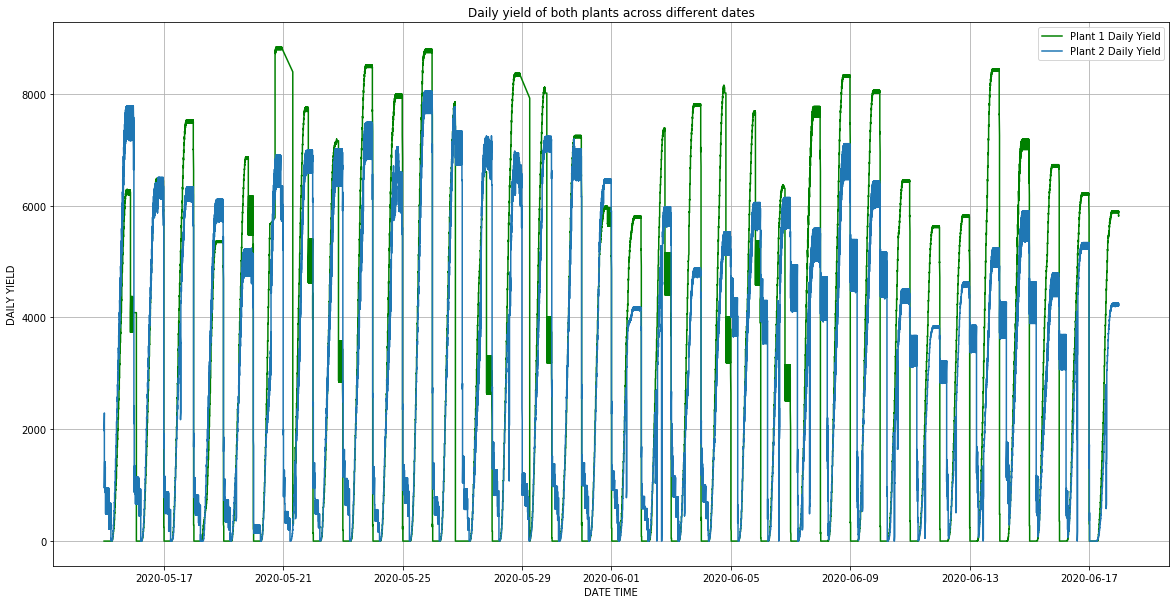

In [21]:
plt.subplots(1,1, figsize=(20,10))
plt.title("Daily yield of both plants across different dates")
plt.plot(df1.DATE_TIME, df1.DAILY_YIELD.rolling(window=20).mean(), label='Plant 1 Daily Yield', c='g')
plt.plot(df3.DATE_TIME, df3.DAILY_YIELD.rolling(window=20).mean(), label='Plant 2 Daily Yield')
plt.xlabel('DATE TIME')
plt.ylabel('DAILY YIELD')
plt.grid()
plt.legend()
plt.show()

#  Inventors vs Total Yield

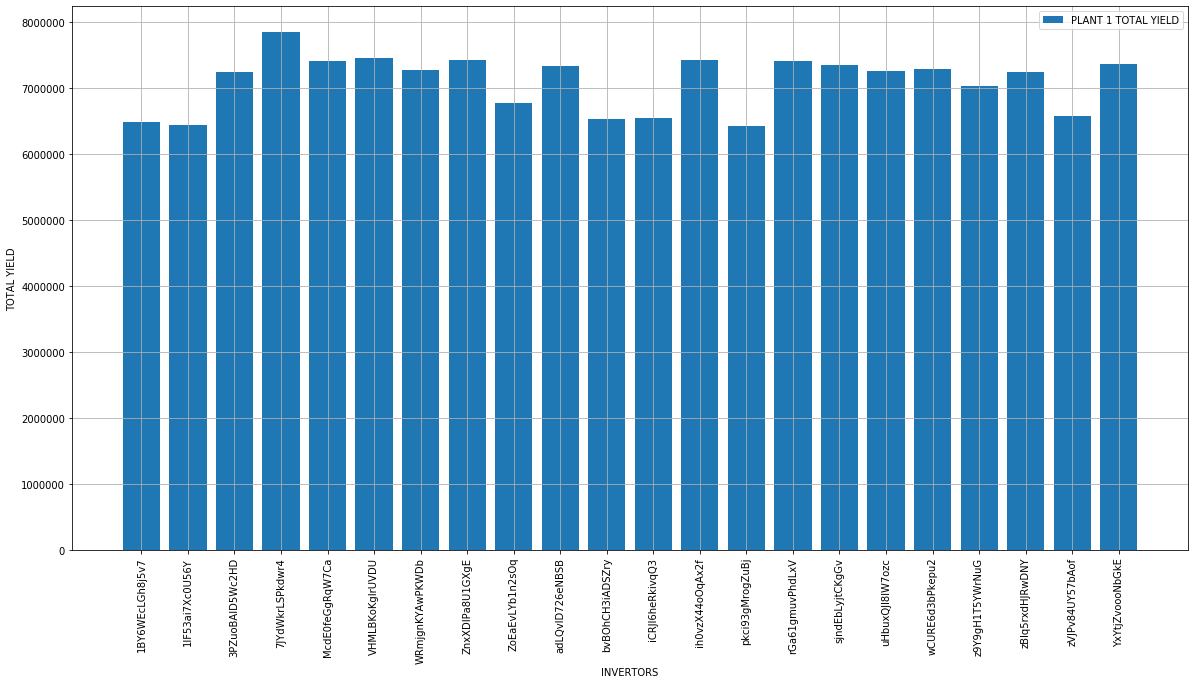

In [22]:
TOTAL = df1.groupby('SOURCE_KEY')['TOTAL_YIELD'].max()
inv_lst = df1['SOURCE_KEY'].unique()
plt.subplots(1,1, figsize=(20,10))
plt.bar(inv_lst,TOTAL, label="PLANT 1 TOTAL YIELD")
plt.xticks(rotation=90)
plt.xlabel('INVERTORS')
plt.ylabel('TOTAL YIELD')
plt.grid()
plt.legend()
plt.show()

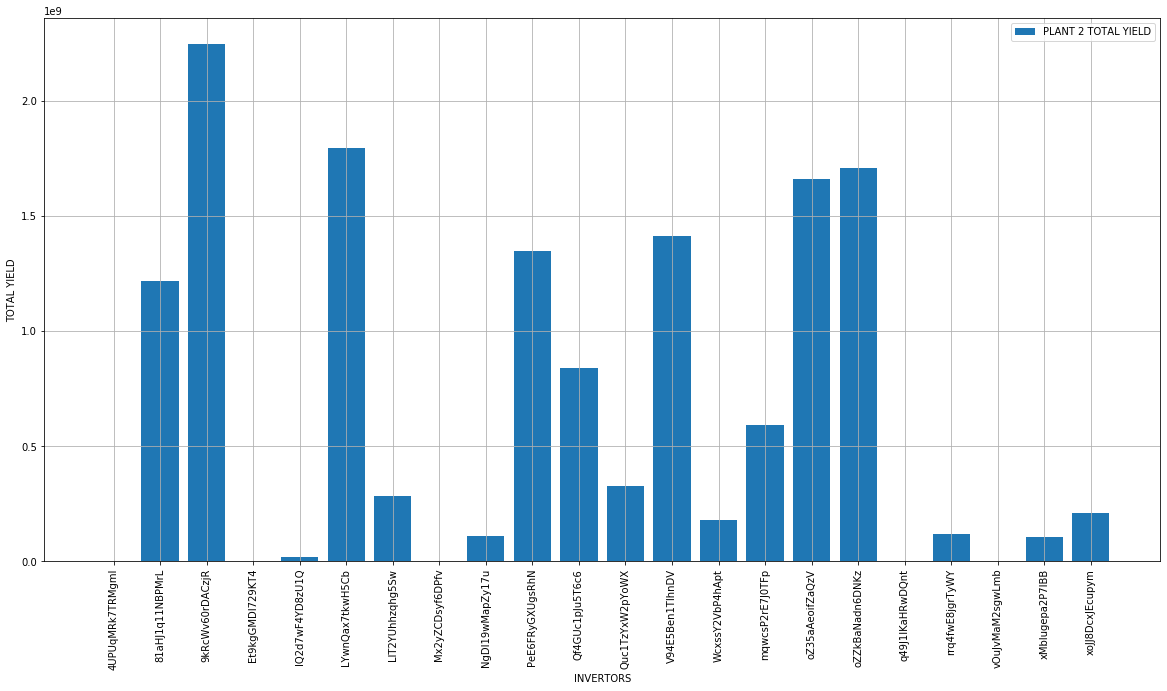

In [23]:
TOTAL = df3.groupby('SOURCE_KEY')['TOTAL_YIELD'].max()
inv_lst = df3['SOURCE_KEY'].unique()
plt.subplots(1,1, figsize=(20,10))
plt.bar(inv_lst,TOTAL, label="PLANT 2 TOTAL YIELD")
plt.xticks(rotation=90)
plt.xlabel('INVERTORS')
plt.ylabel('TOTAL YIELD')
plt.grid()
plt.legend()
plt.show()